In [2]:
import pandas as pd
import numpy as np

In [3]:
laptops_df = pd.read_csv("laptop_data.csv")

In [4]:
laptops_df.head()

,Model,Series,Display Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,793.10
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,532.17
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,340.40
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,1502.17
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1067.73


In [5]:
laptops_df.shape

(1303, 11)

We have a datset comprising of 1300 laptosp whiich will help us in achieving our goal and getitng a decent r2 score. However a larer dataset will build a stronger model.

In [6]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             1303 non-null   object 
 1   Series            1303 non-null   object 
 2   Display Size      1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price (Euros)     1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


looks at info we can see that columns like RAM, SSD, Screen resolution and weight are objects type, which will need to be engineereed to be numerical.

In [7]:
laptops_df.duplicated().sum()

np.int64(29)

we can see there are 29 duplicate values that can be dropped

In [8]:
laptops_df.drop_duplicates(inplace=True)

In [9]:
laptops_df.duplicated().sum()

np.int64(0)

Now all the duplicate values have been removed

In [10]:
laptops_df.isnull().sum()

Model               0
Series              0
Display Size        0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price (Euros)       0
dtype: int64

There are no missing values and lets move on to pre-process the data. I will remove GB from RAM and covert it to int type. Similarly for weight i will remove the kg and covert it to float.

In [11]:
laptops_df['Ram'] = laptops_df['Ram'].str.replace('GB','')
laptops_df['Weight'] = laptops_df['Weight'].str.replace('kg','')

In [12]:
laptops_df.head()

,Model,Series,Display Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros)
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73


In [13]:
laptops_df['Ram'] = laptops_df['Ram'].astype('int32')
laptops_df['Weight'] = laptops_df['Weight'].astype('float32')

In [14]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             1274 non-null   object 
 1   Series            1274 non-null   object 
 2   Display Size      1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price (Euros)     1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


## EDA
### UNIVARIATE ANALYSIS

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

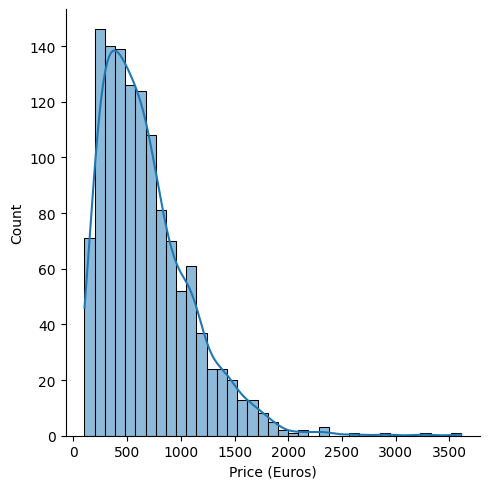

In [16]:
sns.displot(laptops_df['Price (Euros)'], kde=True)

we can clearly see that the data is right skewed. We have more laptops that have a lower price, around 500.

<Axes: xlabel='Model'>

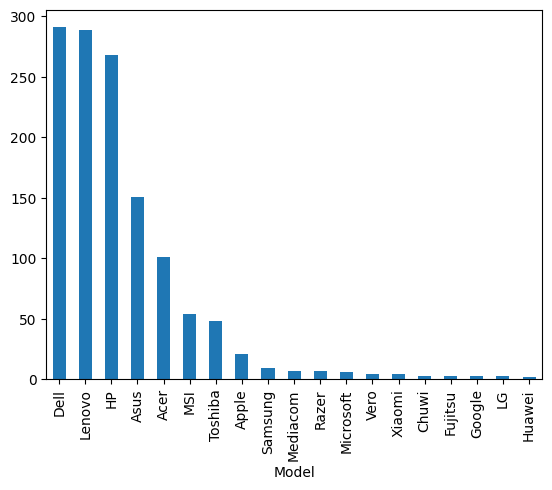

In [17]:
laptops_df['Model'].value_counts().plot(kind='bar')

Let us check the average price of the laptops based on the Model

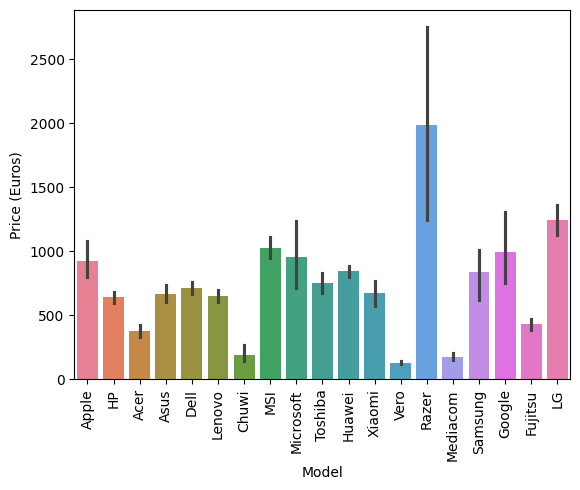

In [18]:
sns.barplot(x=laptops_df['Model'], y=laptops_df['Price (Euros)'], hue=laptops_df['Model'])
plt.xticks(rotation=90)
plt.show()

It can be observed that Razer is the most expensive brand followed by LG, MSI and Apple. While the budget brands are Acer, HP, Lenovo and Dell.

<Axes: xlabel='Series'>

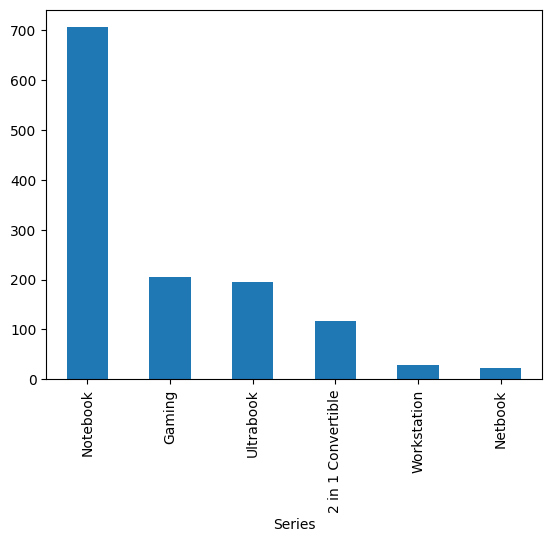

In [19]:
laptops_df['Series'].value_counts().plot(kind='bar')

The count of notebooks is the highest.

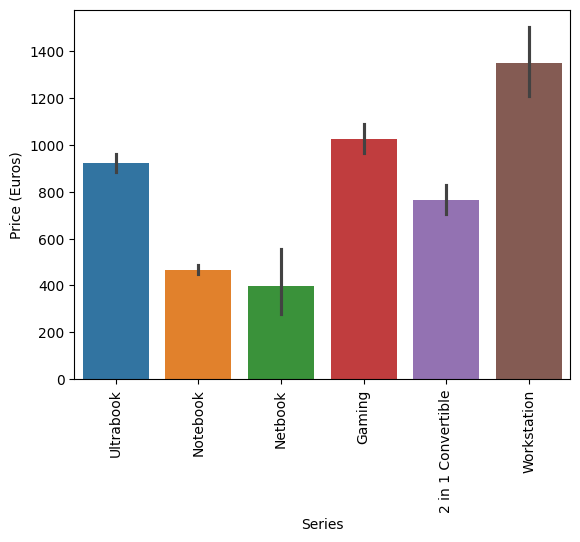

In [20]:
sns.barplot(x=laptops_df['Series'], y=laptops_df['Price (Euros)'], hue=laptops_df['Series'])
plt.xticks(rotation=90)
plt.show()

The high count og notebooks sold can be justified by it's mediocre price. Another key point to note is that the a higer pice is correlated to a lower count. However Netbook is an exception

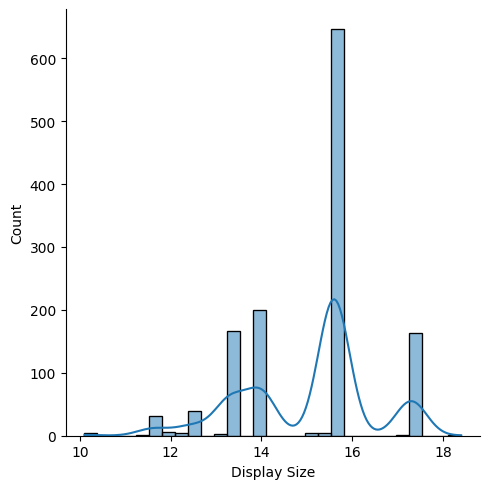

In [21]:
sns.displot(laptops_df['Display Size'], kde = True)
plt.show()

Here it can be seen that the laptops with 16 inches display size were preferred 

<Axes: xlabel='Display Size', ylabel='Price (Euros)'>

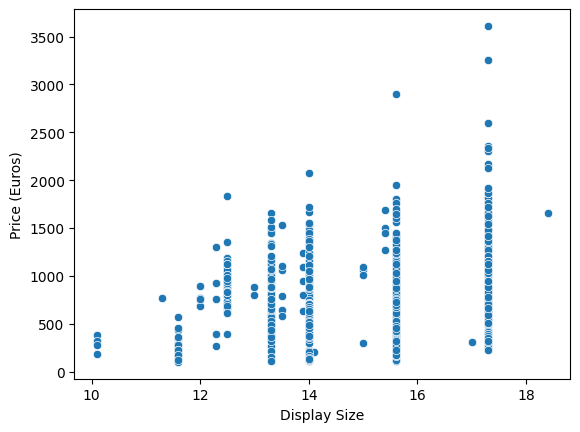

In [22]:
sns.scatterplot(x='Display Size', y='Price (Euros)', data=laptops_df)

it can be seen from the scatterplot that the display size and the price have a positive correlation but not a very strong on. A larger display size is associated with a higher price but the price is similar for 13.5, 14 and 16 inch laptops

The screen resolution columns contains text and multiple pieces of information Like Touchscreen info and IPS panel. Let us feature engineer the ScreenResolution and create a new column for touchscreen and IPS Panel

In [23]:
laptops_df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
IPS Panel 1366x768                                 7
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Retina Display 2560x1600                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
1440x900                     

In [24]:
laptops_df['Touchscreen'] = laptops_df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

Created a function using lambda to check if touch screen is present or not and applied 1 and 0 respecitively

In [25]:
laptops_df.sample(5)

,Model,Series,Display Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen
206,Dell,Notebook,15.6,Touchscreen 1366x768,Intel Core i3 7100U 2.4GHz,6,1TB HDD,Intel HD Graphics 620,Windows 10,2.30,259.89,1
193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,2.80,413.22,0
686,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,AMD Radeon 520,Windows 10,1.86,362.67,0
414,Asus,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.27,549.38,1
350,Dell,Notebook,15.6,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,1200.23,1


let us compare the counts of laptops with touch screen and without touchscreen.

<Axes: xlabel='Touchscreen'>

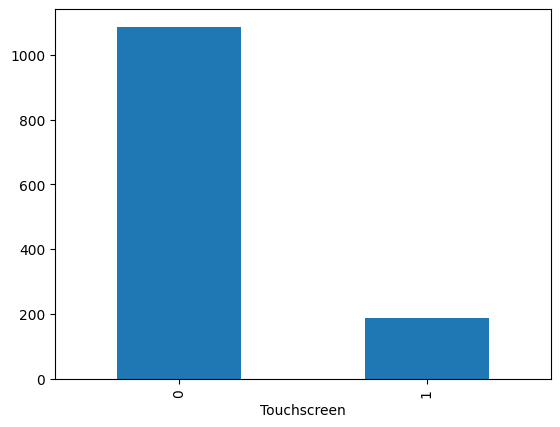

In [26]:
laptops_df['Touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='Touchscreen', ylabel='Price (Euros)'>

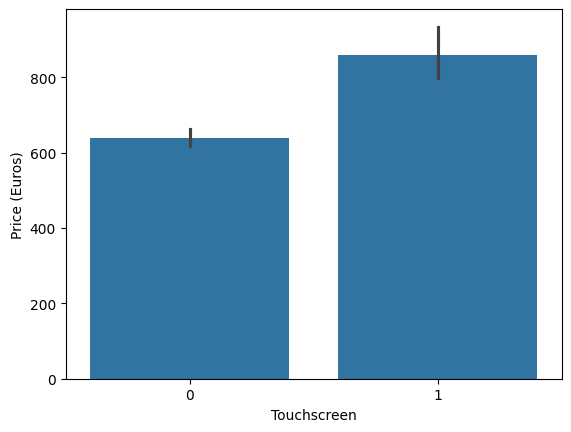

In [27]:
sns.barplot(x='Touchscreen', y='Price (Euros)', data=laptops_df)

here we can clearly see that laptops with touchscreen are more expensive than the ones without touchscreen.

In [28]:
laptops_df['IPS Panel'] = laptops_df['ScreenResolution'].apply(lambda x: 1 if 'IPS Panel' in x else 0)

In [29]:
laptops_df.sample(5)

,Model,Series,Display Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel
288,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.5,697.97,0,1
1209,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.2,1449.81,0,0
448,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,256GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.2,608.42,0,0
267,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 620,No OS,2.2,276.46,0,0
159,Toshiba,Notebook,15.6,1366x768,Intel Core i3 6006U 2.2GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.1,264.62,0,0


<Axes: xlabel='IPS Panel'>

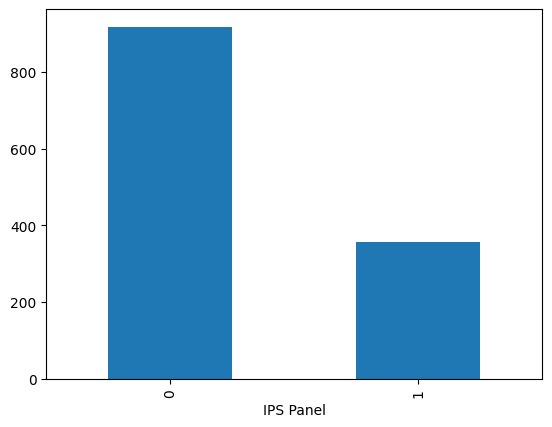

In [30]:
laptops_df['IPS Panel'].value_counts().plot(kind='bar')

<Axes: xlabel='IPS Panel', ylabel='Price (Euros)'>

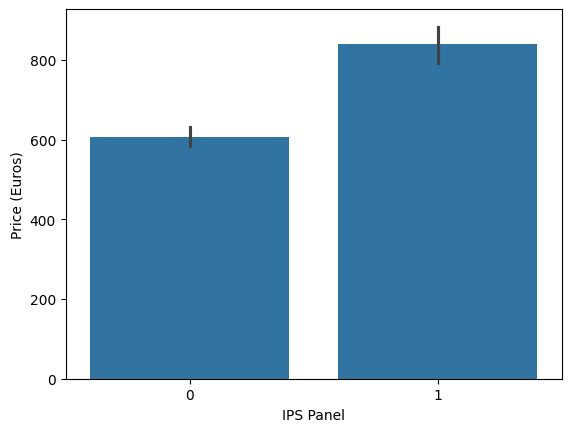

In [31]:
sns.barplot(x='IPS Panel', y='Price (Euros)', data=laptops_df)


here again we can observe that the price of the laptops with IPS Panel is higher than the ones without IPS Panel.

let us feature engineer the Screen resolution pixels into x resolution and y resolution. The reason behind this is to calculate PPI (pixels per inch) which is a measure of pixel density.

In [32]:
temp_df = laptops_df['ScreenResolution'].str.split('x', n=1, expand = True)

In [33]:
laptops_df['X_res'] = temp_df[0]
laptops_df['Y_res'] = temp_df[1]

In [34]:
laptops_df.head()

,Model,Series,Display Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,IPS Panel Retina Display 2560,1600


The x and y resolution has been spereated into two different columns. We stil need to extract the pixel number from x_res

In [35]:
laptops_df['X_res'] = laptops_df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

\d+ looks for one or more digits in a row.

In [36]:
laptops_df.head()

,Model,Series,Display Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,2560,1600


In [37]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             1274 non-null   object 
 1   Series            1274 non-null   object 
 2   Display Size      1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price (Euros)     1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS Panel         1274 non-null   int64  
 13  X_res             1274 non-null   object 
 14  Y_res             1274 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 149.3+ KB


the X_res and Y_res columns are of object data type

In [38]:
laptops_df['X_res'] = laptops_df['X_res'].astype('int')
laptops_df['Y_res'] = laptops_df['Y_res'].astype('int')   

In [39]:
laptops_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Model             1274 non-null   object 
 1   Series            1274 non-null   object 
 2   Display Size      1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price (Euros)     1274 non-null   float64
 11  Touchscreen       1274 non-null   int64  
 12  IPS Panel         1274 non-null   int64  
 13  X_res             1274 non-null   int64  
 14  Y_res             1274 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 149.3+ KB


In [40]:
numeric_df = laptops_df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()['Price (Euros)']
print(correlation)

Display Size     0.066990
Ram              0.740107
Weight           0.212192
Price (Euros)    1.000000
Touchscreen      0.188631
IPS Panel        0.250358
X_res            0.552074
Y_res            0.548111
Name: Price (Euros), dtype: float64


here it can be observed that resolution (X_Res and Y_res) and RAM have a strong positive correlation

Now lets us create a colum called PPI (Pixels Per Inch) usinng inches, X_res and Y_res columns. The folrmula for PPI is = sqrt(X_res^2 + Y_res^2) / inches

In [41]:
laptops_df['PPI'] = (((laptops_df['X_res']**2) + (laptops_df['Y_res']**2))**0.5/laptops_df['Display Size']).astype('float')

In [42]:
laptops_df.corr(numeric_only= True)['Price (Euros)']

Display Size     0.066990
Ram              0.740107
Weight           0.212192
Price (Euros)    1.000000
Touchscreen      0.188631
IPS Panel        0.250358
X_res            0.552074
Y_res            0.548111
PPI              0.469539
Name: Price (Euros), dtype: float64

Here we can see that PPI has a strong correlation with the price of the laptop. 

Since we have extracted all the necessary features from the Screen Resolution column, we can drop the Screen Resolution column from the dataset.


In [43]:
laptops_df.drop(columns = ['ScreenResolution','X_res','Y_res','Display Size'], inplace = True)

In [44]:
laptops_df.head()

,Model,Series,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005


Now let us feature engineer the CPU Columns. Extract the processor and the processor speed.

In [45]:
#returing the first three words of the CPU column
laptops_df['Cpu Name'] = laptops_df['Cpu'].apply(lambda x: " ".join(x.split()[0:3]))

In [46]:
laptops_df.head()

,Model,Series,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5


Now let us create function to input the text from the newly created Cpu Name Column and retutn the different Processor Names.

In [47]:
laptops_df['Cpu Name'].unique()

array(['Intel Core i5', 'Intel Core i7', 'AMD A9-Series 9420',
       'Intel Core i3', 'Intel Core M', 'Intel Atom x5-Z8350',
       'AMD E-Series E2-9000e', 'Intel Atom x5-Z8300',
       'AMD E-Series E2-6110', 'AMD A6-Series 9220', 'Intel Celeron Dual',
       'AMD Ryzen 1700', 'Intel Pentium Quad', 'Intel Atom x5-Z8550',
       'AMD FX 9830P', 'AMD E-Series 6110', 'Intel Xeon E3-1505M',
       'AMD E-Series 9000e', 'AMD A10-Series A10-9620P',
       'AMD A6-Series A6-9220', 'AMD A10-Series 9600P',
       'AMD A8-Series 7410', 'AMD A12-Series 9720P', 'Intel Celeron Quad',
       'AMD Ryzen 1600', 'AMD A10-Series 9620P', 'AMD E-Series 7110',
       'AMD A9-Series A9-9420', 'Intel Xeon E3-1535M',
       'AMD E-Series E2-9000', 'AMD A6-Series 7310', 'Intel Atom Z8350',
       'Intel Pentium Dual', 'AMD A12-Series 9700P', 'AMD A4-Series 7210',
       'AMD FX 8800P', 'Intel Atom X5-Z8350', 'Samsung Cortex A72&A53',
       'AMD E-Series 9000', 'AMD A9-Series 9410'], dtype=object)

Since most of the processors are intel, AMD we can segregate the text based on that.

In [48]:
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Different Intel Processor'
        else:
            return 'AMD Processor'
    

In [49]:
laptops_df['Cpu brand'] = laptops_df['Cpu Name'].apply(processor)

In [50]:
laptops_df.head()

,Model,Series,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

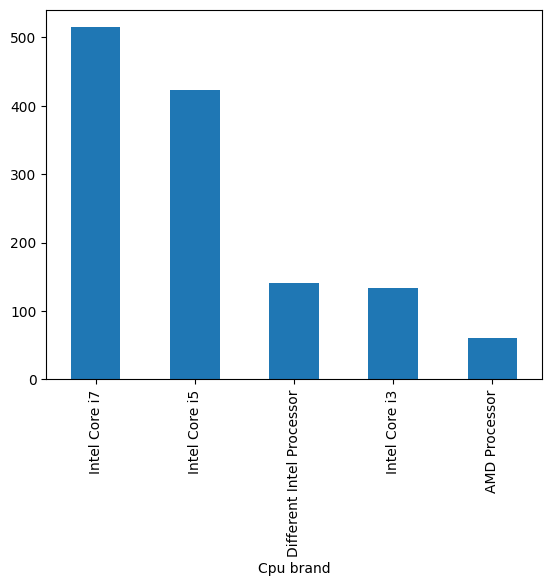

In [51]:
laptops_df['Cpu brand'].value_counts().plot(kind = 'bar')

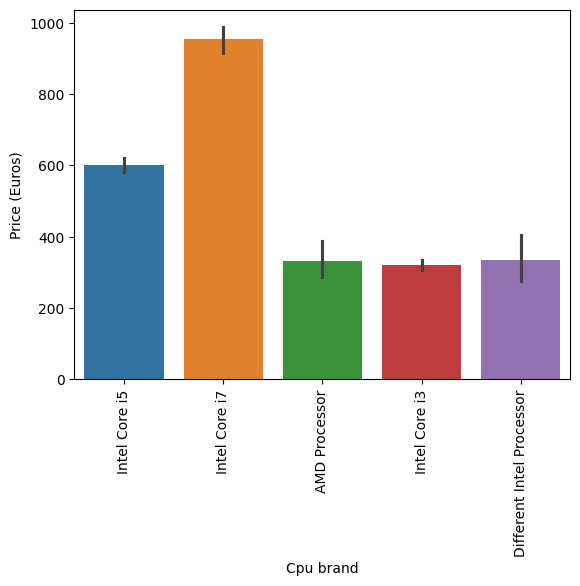

In [52]:
sns.barplot(x=laptops_df['Cpu brand'], y=laptops_df['Price (Euros)'], hue= laptops_df['Cpu brand'])
plt.xticks(rotation=90)
plt.show()

we can see that i7 is themost expensive which is obvious. It can be said that the processor is correlated with the price. Since we only need the CPU brand, the CPu and Cpu name columns cacn be dropped.

In [53]:
laptops_df.drop(columns = ['Cpu', 'Cpu Name'], inplace = True)

In [54]:
laptops_df.head()

,Model,Series,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

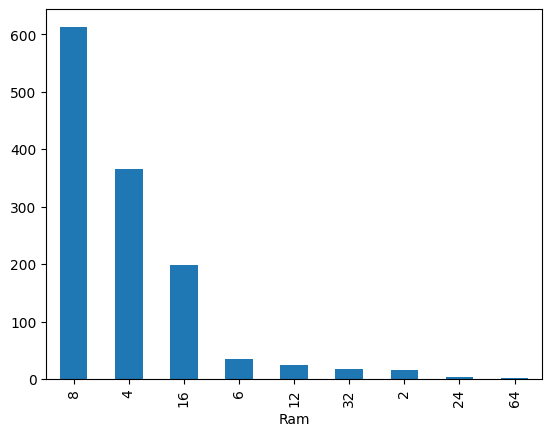

In [55]:
laptops_df['Ram'].value_counts().plot(kind = 'bar')

here it can be observed that 8gb  ram is the most common configuration for laptops.

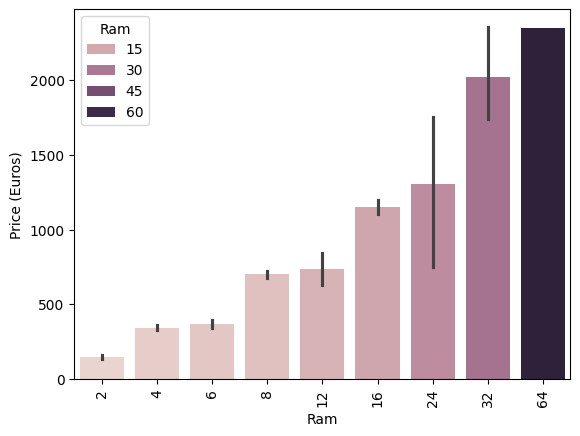

In [56]:
sns.barplot(x=laptops_df['Ram'], y=laptops_df['Price (Euros)'], hue= laptops_df['Ram'])
plt.xticks(rotation=90)
plt.show()

it can be clearly seen that the Ram is Highly correlated with the price. A higher ram correpsonds to a hugher price

In [57]:
laptops_df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
1.0TB Hybrid                       7
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

We will feature engineer the Memory Column into 4 columns. These columns will be HDD, SDD, Flash Storage and Hybrid. The laptos that contain HDD, SDD, Flash Storage and Hybrid will have 1 (1 for GB and 1000 for TB) in the respective column and 0 if not present

In [58]:
# Import necessary libraries
import pandas as pd

# Step 1 - Convert 'Memory' column to string and remove unnecessary '.0' from values
laptops_df['Memory'] = laptops_df['Memory'].astype(str).replace('\.0', '', regex=True)
print("Step 1 - Converted 'Memory' to string and removed '.0':")
print(laptops_df['Memory'].head())

# Step 2 - Remove 'GB' and 'TB' from 'Memory' column
# 'GB' is completely removed, 'TB' is replaced with '000' (as 1 TB = 1000 GB)
laptops_df["Memory"] = laptops_df["Memory"].str.replace('GB', '')
laptops_df["Memory"] = laptops_df["Memory"].str.replace('TB', '000')
print("Step 2 - Removed 'GB' and 'TB' from 'Memory':")
print(laptops_df['Memory'].head())

# Step 3 - Split 'Memory' column into two parts if it contains '+'
# This handles cases where laptops have dual storage types (like SSD + HDD)
new = laptops_df["Memory"].str.split("+", n=1, expand=True)
laptops_df["first"] = new[0].str.strip()
laptops_df["second"] = new[1]
print("Step 3 - Split 'Memory' into 'first' and 'second':")
print(laptops_df[['first', 'second']].head())

# Step 4 - Create binary columns to identify storage types in 'first' part
laptops_df["Layer1HDD"] = laptops_df["first"].apply(lambda x: 1 if "HDD" in x else 0)
laptops_df["Layer1SSD"] = laptops_df["first"].apply(lambda x: 1 if "SSD" in x else 0)
laptops_df["Layer1Hybrid"] = laptops_df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops_df["Layer1Flash_Storage"] = laptops_df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)
print("Step 4 - Created binary columns for storage types in 'first':")
print(laptops_df[['Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage']].head())

# Step 5 - Remove non-digit characters from 'first' part to keep numeric values only
laptops_df['first'] = laptops_df['first'].str.replace(r'\D', '', regex=True)
print("Step 5 - Removed non-digit characters from 'first':")
print(laptops_df['first'].head())

# Step 6 - Fill NaN values in 'second' part with "0" to handle missing values
laptops_df["second"].fillna("0", inplace=True)
print("Step 6 - Filled NaN values in 'second' with '0':")
print(laptops_df['second'].head())

# Step 7 - Create binary columns to identify storage types in 'second' part
laptops_df["Layer2HDD"] = laptops_df["second"].apply(lambda x: 1 if "HDD" in x else 0)
laptops_df["Layer2SSD"] = laptops_df["second"].apply(lambda x: 1 if "SSD" in x else 0)
laptops_df["Layer2Hybrid"] = laptops_df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
laptops_df["Layer2Flash_Storage"] = laptops_df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)
print("Step 7 - Created binary columns for storage types in 'second':")
print(laptops_df[['Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage']].head())

# Step 8 - Remove non-digit characters from 'second' part
laptops_df['second'] = laptops_df['second'].str.replace(r'\D', '', regex=True)
print("Step 8 - Removed non-digit characters from 'second':")
print(laptops_df['second'].head())

# Step 9 - Convert 'first' and 'second' parts to integers, handling errors
try:
    laptops_df["first"] = laptops_df["first"].astype(int)
    laptops_df["second"] = laptops_df["second"].astype(int)
except ValueError as e:
    print(f"Error converting to int: {e}")

# Step 10 - Calculate total storage for each type (HDD, SSD, Hybrid, Flash)
laptops_df["HDD"] = (laptops_df["first"] * laptops_df["Layer1HDD"] + laptops_df["second"] * laptops_df["Layer2HDD"])
laptops_df["SSD"] = (laptops_df["first"] * laptops_df["Layer1SSD"] + laptops_df["second"] * laptops_df["Layer2SSD"])
laptops_df["Hybrid"] = (laptops_df["first"] * laptops_df["Layer1Hybrid"] + laptops_df["second"] * laptops_df["Layer2Hybrid"])
laptops_df["Flash_Storage"] = (laptops_df["first"] * laptops_df["Layer1Flash_Storage"] + laptops_df["second"] * laptops_df["Layer2Flash_Storage"])
print("Step 10 - Calculated total storage for each type:")
print(laptops_df[['HDD', 'SSD', 'Hybrid', 'Flash_Storage']].head())

# Step 11 - Drop intermediate columns to clean up the DataFrame
laptops_df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
                         'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'], inplace=True)
print("Step 11 - Dropped intermediate columns:")
print(laptops_df.head())


Step 1 - Converted 'Memory' to string and removed '.0':
0              128GB SSD
1    128GB Flash Storage
2              256GB SSD
3              512GB SSD
4              256GB SSD
Name: Memory, dtype: object
Step 2 - Removed 'GB' and 'TB' from 'Memory':
0              128 SSD
1    128 Flash Storage
2              256 SSD
3              512 SSD
4              256 SSD
Name: Memory, dtype: object
Step 3 - Split 'Memory' into 'first' and 'second':
               first second
0            128 SSD   None
1  128 Flash Storage   None
2            256 SSD   None
3            512 SSD   None
4            256 SSD   None
Step 4 - Created binary columns for storage types in 'first':
   Layer1HDD  Layer1SSD  Layer1Hybrid  Layer1Flash_Storage
0          0          1             0                    0
1          0          0             0                    1
2          0          1             0                    0
3          0          1             0                    0
4          0          1   

<>:5: SyntaxWarning: invalid escape sequence '\.'
<>:5: SyntaxWarning: invalid escape sequence '\.'
C:\Users\benem\AppData\Local\Temp\ipykernel_37972\2192908499.py:5: SyntaxWarning: invalid escape sequence '\.'
  laptops_df['Memory'] = laptops_df['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\benem\AppData\Local\Temp\ipykernel_37972\2192908499.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  laptops_df["second"].fillna("0", inplace=True)


In [59]:
laptops_df.sample(10)

,Model,Series,Ram,Memory,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
1124,Asus,Notebook,4,1000 HDD,Intel HD Graphics 620,Windows 10,2.00,257.52,0,0,100.454670,Intel Core i3,1000,0,0,0
939,Dell,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1080,Windows 10,4.36,1632.74,0,0,169.780899,Intel Core i7,1000,512,0,0
610,Lenovo,Notebook,32,1000 SSD,Nvidia Quadro M2200M,Windows 10,2.50,2900.21,0,1,282.423996,Different Intel Processor,0,1000,0,0
1079,HP,Notebook,4,500 HDD,Intel HD Graphics 520,Windows 7,2.31,556.48,0,0,141.211998,Intel Core i5,500,0,0,0
200,Dell,Gaming,16,512 SSD + 1000 HDD,Nvidia GeForce GTX 1060,Windows 10,2.65,1092.24,0,1,282.423996,Intel Core i7,1000,512,0,0
432,Lenovo,Notebook,4,128 SSD,Intel HD Graphics 620,Windows 10,1.70,354.61,0,1,157.350512,Intel Core i3,0,128,0,0
423,Asus,Notebook,8,1000 HDD,Nvidia GeForce 940MX,Linux,2.30,353.42,0,0,141.211998,Intel Core i3,1000,0,0,0
979,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.99,1035.41,0,0,127.335675,Intel Core i7,1000,256,0,0
595,Lenovo,Notebook,8,1000 HDD,Intel HD Graphics 520,Windows 10,2.29,271.73,0,0,100.454670,Intel Core i3,1000,0,0,0
1245,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,947.20,0,1,141.211998,Intel Core i7,1000,256,0,0


we can drop the memory column as it is redundant

In [60]:
laptops_df.drop(columns = ['Memory'], inplace = True)

In [61]:
laptops_df.head()

,Model,Series,Ram,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5,0,256,0,0


In [62]:
laptops_df.corr(numeric_only = True)['Price (Euros)']

Ram              0.740107
Weight           0.212192
Price (Euros)    1.000000
Touchscreen      0.188631
IPS Panel        0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage   -0.037176
Name: Price (Euros), dtype: float64

Here we see that HDD is negatively correlated with a weal realtion. SSD on the other hand is highly correlated. Hybrid and flash storage have a low correlation and can be dropped.

In [63]:
laptops_df.drop(columns = ['Hybrid', 'Flash_Storage'], inplace = True)

In [64]:
laptops_df.head()

,Model,Series,Ram,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5,0,256


In [65]:
laptops_df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

We will segregate the baove values based on the brand name as any other category wont be useful in this ase as the data is less.

In [66]:
laptops_df['Gpu Brand'] = laptops_df['Gpu'].apply(lambda x: x.split()[0])

In [67]:
laptops_df.head()

,Model,Series,Ram,Gpu,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,793.10,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,532.17,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,340.40,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5,0,256,Intel


In [68]:
laptops_df['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    396
AMD       174
ARM         1
Name: count, dtype: int64

we can drop ARM as 1 value wont make any difference.

In [69]:
laptops_df = laptops_df[laptops_df['Gpu Brand'] != 'ARM']

In [70]:
laptops_df['Gpu Brand'].value_counts()

Gpu Brand
Intel     703
Nvidia    396
AMD       174
Name: count, dtype: int64

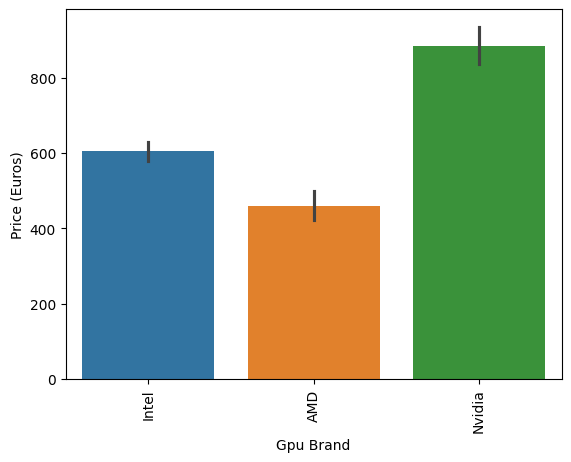

In [71]:
sns.barplot(x=laptops_df['Gpu Brand'], y=laptops_df['Price (Euros)'], hue= laptops_df['Gpu Brand'])
plt.xticks(rotation=90)
plt.show()

Laptops with NVIDIA are the most expensive, followed by Intel. We can also drop the GPU column as it is redundant.

In [72]:
laptops_df.drop(columns = ['Gpu'], inplace = True)

In [73]:
laptops_df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

lets reduce our categories and club all windows OS together, all MAC OS together and the remaning together as others.

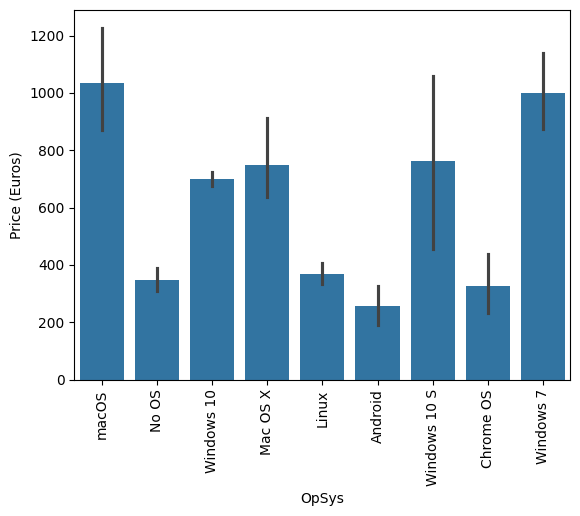

In [74]:
sns.barplot(x = laptops_df['OpSys'], y = laptops_df['Price (Euros)'])
plt.xticks(rotation = 90)
plt.show()

Here we can see Mac OS is expensive. Surprisingly, Windows 7 is costlier than windows 10.

In [75]:
def OS_cat(input):
    if input == 'Windows 10' or input == 'Windows 7' or input == 'Windows 10.5':
        return 'Windows'
    elif input == 'macOS' or input == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/ Linux'

In [76]:
laptops_df['OS'] = laptops_df['OpSys'].apply(OS_cat )

In [77]:
laptops_df.head()

,Model,Series,Ram,OpSys,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,macOS,1.37,793.10,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,532.17,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,340.40,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/ Linux
3,Apple,Ultrabook,16,macOS,1.83,1502.17,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,1067.73,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [78]:
laptops_df.drop(columns = ['OpSys'], inplace = True)

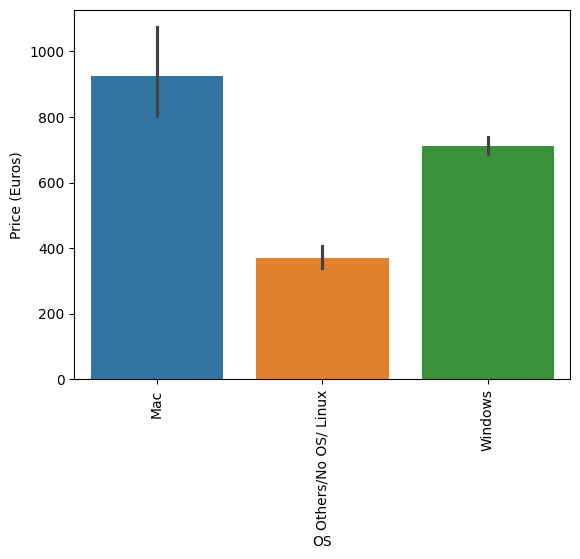

In [79]:
sns.barplot(x=laptops_df['OS'], y=laptops_df['Price (Euros)'], hue= laptops_df['OS'])
plt.xticks(rotation=90)
plt.show()

As expected MAC is the most expensive

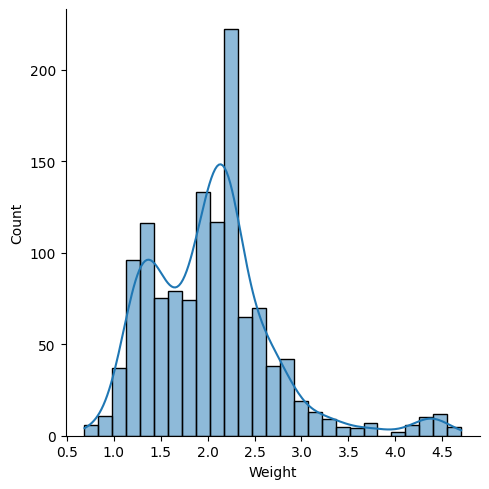

In [80]:
sns.displot(laptops_df['Weight'], kde = True)

<Axes: >

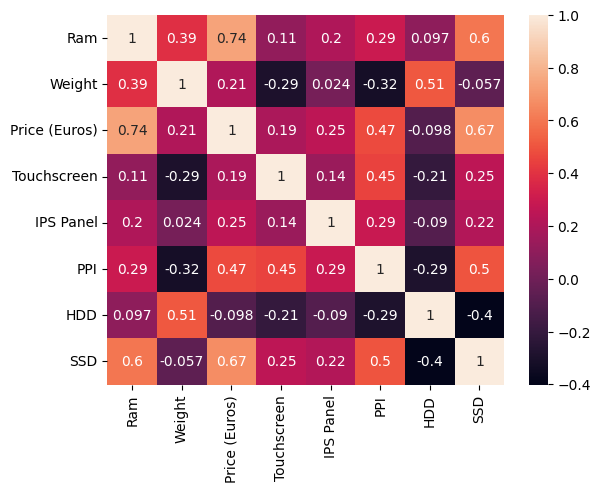

In [81]:
sns.heatmap(laptops_df.corr(numeric_only = True), annot=True)

The above heatmap shows that there is no problem of multicollinearity Now let us handle the skewness our target column Price that we had identified earlier.

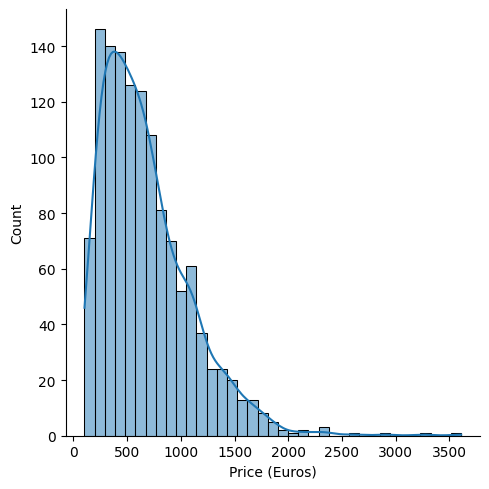

In [82]:
sns.displot(laptops_df['Price (Euros)'], kde = True)

Let us apply log transform to handle the skewness

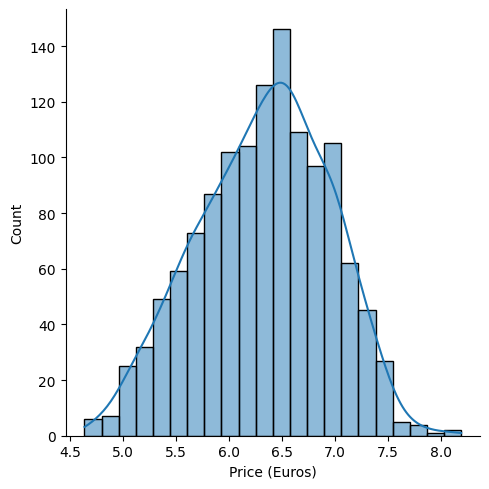

In [83]:
laptops_df['Price (Euros)'] = np.log(laptops_df['Price (Euros)'])
sns.displot(laptops_df['Price (Euros)'], kde = True)

In [84]:
x = laptops_df.drop(columns = ['Price (Euros)'])
y = laptops_df['Price (Euros)']

In [85]:
x

,Model,Series,Ram,Weight,Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/ Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.50,0,0,111.935204,Different Intel Processor,0,0,Intel,Windows


In [86]:
y

0       6.675949
1       6.276963
2       5.830121
3       7.314666
4       6.973290
          ...   
1269    6.055448
1270    5.934100
1271    6.788307
1272    4.909488
1273    6.114324
Name: Price (Euros), Length: 1273, dtype: float64

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state = 2  )

In [88]:
x_train

,Model,Series,Ram,Weight,Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
716,Dell,Notebook,8,1.90,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
968,Dell,Gaming,32,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16,1.36,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
1234,Apple,Ultrabook,4,1.08,0,0,135.094211,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/ Linux


The training dataset with independent varibale is ready. However we still need to convert the categorical columns to numerical using. It can be achieved all together with Columns Transform and Pipeline from sklearn.

In [89]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder 
from sklearn.metrics import r2_score, mean_absolute_error

Let us import multiple algorithms from sklearn to test the best performing algorithm.

In [90]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor 

## LinearRegression

In [91]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.784593008209739
MAE 0.22073490848515412


## Ridge Regression

In [92]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = Ridge(alpha = 10)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.7949721236772554
MAE 0.21854437698994783


## LASSO  Regression

In [93]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = Lasso(alpha = 0.001)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.793797227792856
MAE 0.21838376630696205


## KNN

In [94]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = KNeighborsRegressor(n_neighbors = 3)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.7461278770903734
MAE 0.2146022311919083


In [95]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = DecisionTreeRegressor(max_depth=6)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.7714473247236748
MAE 0.22712958790313523


## SVM 

In [96]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = SVR(kernel = 'rbf', C = 1000, epsilon = 0.1)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.769539809085806
MAE 0.23119106179682553


## Random Forest

In [97]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples = 0.5,
                              max_features = 0.75,
                              max_depth = 15)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8546012902052809
MAE 0.17723463433785444


## Gradient Boosting Regressor

In [98]:
step1 = ColumnTransformer(transformers = [
    ('col_tnf', OneHotEncoder(sparse_output = False, drop = 'first'),[0,1,7,10,11])
],remainder = 'passthrough')

step2 = GradientBoostingRegressor(n_estimators = 500)

pipe = Pipeline([
    
    ('step1', step1),
    ('Step2', step2)
])

pipe.fit(x_train, y_train)

y_pred = pipe.predict(x_test)

print('R2 score', r2_score(y_test, y_pred))
print('MAE', mean_absolute_error(y_test, y_pred))


R2 score 0.8531975191018996
MAE 0.1726077960303438


## Voting Regressor 
A Voting Regressor is a technique that combines the predictions of multiple regression models to get a final prediction. It’s like asking multiple experts (different models) for their opinions and then averaging their answers to make a final decision.

In [99]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15, bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10, bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8646379598532101
MAE 0.17216846698113702


There is a slight improvement in the R2 score and MAE

## Stacking

Stacking (or Stacked Generalization) is an ensemble learning technique that combines multiple machine learning models to improve predictive accuracy. Instead of taking a simple average (like in Voting Regressor), stacking learns how to best combine the predictions of multiple models.

In [100]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(x_train,y_train)

y_pred = pipe.predict(x_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8558086774164847
MAE 0.18077032142954283


The r2 score for Voting and stacking is not very far away from teh models. From this we can infer that either the base models are strong, too similar or the Hyperparameters can be improved. 

Out of all the models trained, the best model is the Random Forest Regressor model.

## Exporting the model

In [101]:
import pickle

pickle.dump(laptops_df, open('laptops_df.pkl','wb'))
pickle.dump(pipe, open('pipe.pkl','wb'))

In [102]:
laptops_df

,Model,Series,Ram,Weight,Price (Euros),Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
0,Apple,Ultrabook,8,1.37,6.675949,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,6.276963,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,5.830121,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/ Linux
3,Apple,Ultrabook,16,1.83,7.314666,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,6.973290,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,2.20,6.055448,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1270,Lenovo,2 in 1 Convertible,4,1.80,5.934100,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,6.788307,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1272,Lenovo,Notebook,2,1.50,4.909488,0,0,111.935204,Different Intel Processor,0,0,Intel,Windows


In [103]:
x_train

,Model,Series,Ram,Weight,Touchscreen,IPS Panel,PPI,Cpu brand,HDD,SSD,Gpu Brand,OS
716,Dell,Notebook,8,1.90,0,0,141.211998,Intel Core i5,0,256,Intel,Windows
21,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,128,Nvidia,Windows
968,Dell,Gaming,32,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
273,Lenovo,2 in 1 Convertible,16,1.36,1,0,209.800683,Intel Core i7,0,512,Intel,Windows
1234,Apple,Ultrabook,4,1.08,0,0,135.094211,Intel Core i5,0,0,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/ Linux
